In [1]:
import pandas as pd
import numpy as np

input = './data/final_df.csv'
df = pd.read_csv(input, nrows=3720)
# df = pd.read_csv(input)

df['season'] = df['season'].astype('category')

df['round'] = df['round'].astype('category')

df['date'] = pd.to_datetime(df['date'])

df['start_time'] = df['start_time'].astype('category')

df['driver_name'] = df['driver_name'].astype('category')

df['date_of_birth'] = pd.to_datetime(df['date_of_birth'])
# df['age2'] = (df['date'] - df['date_of_birth']).astype('<m8[Y]') # Original, ValueError
df['age2'] = (df['date'] - df['date_of_birth'])
df['age2'] = df['age2'] / np.timedelta64(1, 'Y')
df['age2'] = np.floor(df['age2'])
# df['age2'] = df['age2'].astype('<m8[Y]') # Somehow, converts year back to days
# display(df['age2'])

df['date_of_birth'] = df['age2']
df.rename(columns={'date_of_birth': 'age'}, inplace=True)
df = df.drop('age2', axis=1)

df['driver_nationality'] = df['driver_nationality'].astype('category')

category_order0 = [0.0, 24.0, 23.0, 22.0, 21.0, 20.0, 19.0, 18.0, 17.0, 16.0, 15.0, 14.0, 13.0, 
                  12.0, 11.0, 10.0, 9.0, 8.0, 7.0, 6.0, 5.0, 4.0, 3.0, 2.0, 1.0]
df['driver_standings_pos'] = pd.Categorical(df['driver_standings_pos'], categories=category_order0, ordered=True)

df['initial_tyre'] = df['initial_tyre'].fillna(df.groupby('circuit_id')['initial_tyre'].transform(lambda x: x.mode().iloc[0]))
df['initial_tyre'] = df['initial_tyre'].astype('category')

max_values0 = df.groupby(['season', 'round'])['qualifying_position'].transform('max')
df['qualifying_position'] = df['qualifying_position'].fillna(max_values0 + 1)
category_order1 = [22.0, 21.0, 20.0, 19.0, 18.0, 17.0, 16.0, 15.0, 14.0, 13.0, 12.0, 
                   11.0, 10.0, 9.0, 8.0, 7.0, 6.0, 5.0, 4.0, 3.0, 2.0, 1.0]

max_time_values0 = df.groupby(['season', 'round'])['qualifying_time'].transform('max')
df['qualifying_time'] = df['qualifying_time'].fillna(max_time_values0)

df['circuit_id'] = df['circuit_id'].astype('category')

df['circuit_name'] = df['circuit_name'].astype('category')

df['circuit_city'] = df['circuit_city'].astype('category')

df['circuit_country'] = df['circuit_country'].astype('category')

df['constructor_name'] = df['constructor_name'].astype('category')

df['constructor_country'] = df['constructor_country'].astype('category')

category_order2 = [0.0, 11.0, 10.0, 9.0, 8.0, 7.0, 6.0, 5.0, 4.0, 3.0, 2.0, 1.0]
df['constructor_standings_pos'] = pd.Categorical(df['constructor_standings_pos'], categories=category_order2, ordered=True)

mask1 = (df['season'] == 2020) & (df['round'] == 11)
df.loc[mask1, ['fp_pos_1', 'fp_time_1']] = df.loc[mask1, ['fp_pos_3', 'fp_time_3']].values
max_values1 = df.groupby(['season', 'round'])['fp_pos_1'].transform('max')
max_time_values1 = df.groupby(['season', 'round'])['fp_time_1'].transform('max')
df['fp_pos_1'] = df['fp_pos_1'].fillna(max_values1 + 1)
df['fp_time_1'] = df['fp_time_1'].fillna(max_time_values1)

mask2 = (df['season'] == 2015) & (df['round'] == 16)
avg_fp_time = round(df.loc[mask2, ['fp_time_1', 'fp_time_3']].mean(axis=1))
df.loc[mask2, 'fp_time_2'] = avg_fp_time
df.loc[mask2, 'fp_pos_2'] = df.loc[mask2, 'fp_time_2'].rank(method='min')
mask3 = (df['season'] == 2017) & (df['round'] == 2)
avg_fp_time2 = round(df.loc[mask3, ['fp_time_1', 'fp_time_3']].mean(axis=1))
df.loc[mask3, 'fp_time_2'] = avg_fp_time2
df.loc[mask3, 'fp_pos_2'] = df.loc[mask3, 'fp_time_2'].rank(method='min')
mask4 = (df['season'] == 2020) & (df['round'] == 11)
df.loc[mask4, ['fp_pos_2', 'fp_time_2']] = df.loc[mask4, ['fp_pos_3', 'fp_time_3']].values
mask5 = (df['season'] == 2020) & (df['round'] == 13)
df.loc[mask5, ['fp_pos_2', 'fp_time_2']] = df.loc[mask5, ['fp_pos_1', 'fp_time_1']].values
mask6 = (df['season'] == 2023) & (df['round'] == 4)
df.loc[mask6, ['fp_pos_2', 'fp_time_2']] = df.loc[mask6, ['fp_pos_1', 'fp_time_1']].values
mask7 = (df['season'] == 2023) & (df['round'] == 9)
df.loc[mask7, ['fp_pos_2', 'fp_time_2']] = df.loc[mask7, ['fp_pos_1', 'fp_time_1']].values
mask8 = (df['season'] == 2023) & (df['round'] == 12)
df.loc[mask8, ['fp_pos_2', 'fp_time_2']] = df.loc[mask8, ['fp_pos_1', 'fp_time_1']].values
mask9 = (df['season'] == 2023) & (df['round'] == 17)
df.loc[mask9, ['fp_pos_2', 'fp_time_2']] = df.loc[mask9, ['fp_pos_1', 'fp_time_1']].values
mask10 = (df['season'] == 2023) & (df['round'] == 18)
df.loc[mask10, ['fp_pos_2', 'fp_time_2']] = df.loc[mask10, ['fp_pos_1', 'fp_time_1']].values
mask11 = (df['season'] == 2023) & (df['round'] == 20)
df.loc[mask11, ['fp_pos_2', 'fp_time_2']] = df.loc[mask11, ['fp_pos_1', 'fp_time_1']].values
max_values2 = df.groupby(['season', 'round'])['fp_pos_2'].transform('max')
max_time_values2 = df.groupby(['season', 'round'])['fp_time_2'].transform('max')
df['fp_pos_2'] = df['fp_pos_2'].fillna(max_values2 + 1)
df['fp_time_2'] = df['fp_time_2'].fillna(max_time_values2)

mask12 = (df['season'] == 2019) & (df['round'] == 17)
avg_fp_time3 = round(df.loc[mask12, ['fp_time_1', 'fp_time_2']].mean(axis=1))
df.loc[mask12, 'fp_time_3'] = avg_fp_time3
df.loc[mask12, 'fp_pos_3'] = df.loc[mask12, 'fp_time_3'].rank(method='min')
mask13 = (df['season'] == 2020) & (df['round'] == 2)
avg_fp_time4 = round(df.loc[mask13, ['fp_time_1', 'fp_time_2']].mean(axis=1))
df.loc[mask13, 'fp_time_3'] = avg_fp_time4
df.loc[mask13, 'fp_pos_3'] = df.loc[mask13, 'fp_time_3'].rank(method='min')
mask14 = (df['season'] == 2020) & (df['round'] == 13)
df.loc[mask14, ['fp_pos_3', 'fp_time_3']] = df.loc[mask14, ['fp_pos_1', 'fp_time_1']].values
mask15 = (df['season'] == 2021) & (df['round'] == 10)
avg_fp_time5 = round(df.loc[mask15, ['fp_time_1', 'fp_time_2']].mean(axis=1))
df.loc[mask15, 'fp_time_3'] = avg_fp_time5
df.loc[mask15, 'fp_pos_3'] = df.loc[mask15, 'fp_time_3'].rank(method='min')
mask16 = (df['season'] == 2021) & (df['round'] == 14)
avg_fp_time6 = round(df.loc[mask16, ['fp_time_1', 'fp_time_2']].mean(axis=1))
df.loc[mask16, 'fp_time_3'] = avg_fp_time6
df.loc[mask16, 'fp_pos_3'] = df.loc[mask16, 'fp_time_3'].rank(method='min')
mask17 = (df['season'] == 2021) & (df['round'] == 15)
avg_fp_time7 = round(df.loc[mask17, ['fp_time_1', 'fp_time_2']].mean(axis=1))
df.loc[mask17, 'fp_time_3'] = avg_fp_time7
df.loc[mask17, 'fp_pos_3'] = df.loc[mask17, 'fp_time_3'].rank(method='min')
mask18 = (df['season'] == 2021) & (df['round'] == 19)
avg_fp_time8 = round(df.loc[mask18, ['fp_time_1', 'fp_time_2']].mean(axis=1))
df.loc[mask18, 'fp_time_3'] = avg_fp_time8
df.loc[mask18, 'fp_pos_3'] = df.loc[mask18, 'fp_time_3'].rank(method='min')
mask19 = (df['season'] == 2022) & (df['round'] == 4)
avg_fp_time9 = round(df.loc[mask19, ['fp_time_1', 'fp_time_2']].mean(axis=1))
df.loc[mask19, 'fp_time_3'] = avg_fp_time9
df.loc[mask19, 'fp_pos_3'] = df.loc[mask19, 'fp_time_3'].rank(method='min')
mask20 = (df['season'] == 2022) & (df['round'] == 11)
avg_fp_time10 = round(df.loc[mask20, ['fp_time_1', 'fp_time_2']].mean(axis=1))
df.loc[mask20, 'fp_time_3'] = avg_fp_time10
df.loc[mask20, 'fp_pos_3'] = df.loc[mask20, 'fp_time_3'].rank(method='min')
mask21 = (df['season'] == 2022) & (df['round'] == 21)
avg_fp_time11 = round(df.loc[mask21, ['fp_time_1', 'fp_time_2']].mean(axis=1))
df.loc[mask21, 'fp_time_3'] = avg_fp_time11
df.loc[mask21, 'fp_pos_3'] = df.loc[mask21, 'fp_time_3'].rank(method='min')
mask22 = (df['season'] == 2023) & (df['round'] == 4)
df.loc[mask22, ['fp_pos_3', 'fp_time_3']] = df.loc[mask22, ['fp_pos_1', 'fp_time_1']].values
mask23 = (df['season'] == 2023) & (df['round'] == 9)
df.loc[mask23, ['fp_pos_3', 'fp_time_3']] = df.loc[mask23, ['fp_pos_1', 'fp_time_1']].values
mask24 = (df['season'] == 2023) & (df['round'] == 12)
df.loc[mask24, ['fp_pos_3', 'fp_time_3']] = df.loc[mask24, ['fp_pos_1', 'fp_time_1']].values
mask25 = (df['season'] == 2023) & (df['round'] == 17)
df.loc[mask25, ['fp_pos_3', 'fp_time_3']] = df.loc[mask25, ['fp_pos_1', 'fp_time_1']].values
mask26 = (df['season'] == 2023) & (df['round'] == 18)
df.loc[mask26, ['fp_pos_3', 'fp_time_3']] = df.loc[mask26, ['fp_pos_1', 'fp_time_1']].values
mask27 = (df['season'] == 2023) & (df['round'] == 20)
df.loc[mask27, ['fp_pos_3', 'fp_time_3']] = df.loc[mask27, ['fp_pos_1', 'fp_time_1']].values
max_values3 = df.groupby(['season', 'round'])['fp_pos_3'].transform('max')
max_time_values3 = df.groupby(['season', 'round'])['fp_time_3'].transform('max')
df['fp_pos_3'] = df['fp_pos_3'].fillna(max_values3 + 1)
df['fp_time_3'] = df['fp_time_3'].fillna(max_time_values3)

category_order3 = [23.0, 22.0, 21.0, 20.0, 19.0, 18.0, 17.0, 16.0, 15.0, 14.0, 13.0, 
                  12.0, 11.0, 10.0, 9.0, 8.0, 7.0, 6.0, 5.0, 4.0, 3.0, 2.0, 1.0]
df['fp_pos_1'] = pd.Categorical(df['fp_pos_1'], categories=category_order3, ordered=True)
category_order4 = [22.0, 21.0, 20.0, 19.0, 18.0, 17.0, 16.0, 15.0, 14.0, 13.0, 
                  12.0, 11.0, 10.0, 9.0, 8.0, 7.0, 6.0, 5.0, 4.0, 3.0, 2.0, 1.0]
df['fp_pos_2'] = pd.Categorical(df['fp_pos_2'], categories=category_order4, ordered=True)
category_order5 = [22.0, 21.0, 20.0, 19.0, 18.0, 17.0, 16.0, 15.0, 14.0, 13.0, 
                  12.0, 11.0, 10.0, 9.0, 8.0, 7.0, 6.0, 5.0, 4.0, 3.0, 2.0, 1.0]
df['fp_pos_3'] = pd.Categorical(df['fp_pos_3'], categories=category_order5, ordered=True)

df['weather_cloudy'] = df['weather_cloudy'].astype('category')

df['weather_cold'] = df['weather_cold'].astype('category')

df['weather_dry'] = df['weather_dry'].astype('category')

df['weather_warm'] = df['weather_warm'].astype('category')

df['weather_wet'] = df['weather_wet'].astype('category')

mask28 = ~df['has_sprint']

df['has_sprint'] = df['has_sprint'].astype('category')

df.loc[mask28, 'sprint_qualifying_position'] = df.loc[mask28, 'qualifying_position'].values
max_values4 = df.groupby(['season', 'round'])['sprint_qualifying_position'].transform('max')
df['sprint_qualifying_position'] = df['sprint_qualifying_position'].fillna(max_values4 + 1)
category_order6 = [22.0, 21.0, 20.0, 19.0, 18.0, 17.0, 16.0, 15.0, 14.0, 13.0, 12.0, 
                   11.0, 10.0, 9.0, 8.0, 7.0, 6.0, 5.0, 4.0, 3.0, 2.0, 1.0]
df['sprint_qualifying_position'] = pd.Categorical(df['sprint_qualifying_position'], categories=category_order6, ordered=True)

df['qualifying_position'] = pd.Categorical(df['qualifying_position'], categories=category_order1, ordered=True)

df.loc[mask28, 'sprint_qualifying_time'] = df.loc[mask28, 'qualifying_time'].values
max_time_values4 = df.groupby(['season', 'round'])['sprint_qualifying_time'].transform('max')
df['sprint_qualifying_time'] = df['sprint_qualifying_time'].fillna(max_time_values4)

df = df.drop('sprint_laps', axis=1)

category_order7 = [22.0, 21.0, 20.0, 19.0, 18.0, 17.0, 16.0, 15.0, 14.0, 13.0, 12.0, 
                   11.0, 10.0, 9.0, 8.0, 7.0, 6.0, 5.0, 4.0, 3.0, 2.0, 1.0]

df['num_o_ps'] = df['num_o_ps'].fillna(0)

max_values5 = df.groupby(['season', 'round'])['time'].transform('max')
max_values6 = df.groupby(['season', 'round'])['fl_time'].transform('max')
df['time'] = df['time'].fillna(max_values5 + max_values6)

df['status'] = df['status'].astype('category')

mask29 = (df['season'] == 2021) & (df['round'] == 12)
df.loc[mask29, ['fl_pos', 'fl_time']] = df.loc[mask29, ['podium', 'time']].values

max_values7 = df.groupby(['season', 'round'])['fl_pos'].transform('max')
df['fl_pos'] = df['fl_pos'].fillna(max_values7 + 1)

df.loc[mask28, 'sprint_fl_pos'] = df.loc[mask28, 'fl_pos'].values

max_values8 = df.groupby(['season', 'round'])['sprint_fl_pos'].transform('max')
df['sprint_fl_pos'] = df['sprint_fl_pos'].fillna(max_values8 + 1)
mask30 = (df['season'] == 2023) & (df['round'] == 12)
df.loc[mask30, 'sprint_fl_time'] = np.maximum(df.loc[mask30, 'sprint_qualifying_time'], df.loc[mask30, 'qualifying_time'])
df.loc[mask30, 'sprint_fl_pos'] = df.loc[mask30, 'sprint_fl_time'].rank(method='min')

category_order8 = [22.0, 21.0, 20.0, 19.0, 18.0, 17.0, 16.0, 15.0, 14.0, 13.0, 12.0, 
                   11.0, 10.0, 9.0, 8.0, 7.0, 6.0, 5.0, 4.0, 3.0, 2.0, 1.0]
df['sprint_fl_pos'] = pd.Categorical(df['sprint_fl_pos'], categories=category_order8, ordered=True)
df['fl_pos'] = pd.Categorical(df['fl_pos'], categories=category_order8, ordered=True)

df['fl_time'] = df['fl_time'].fillna(max_values6)

max_values9 = df.groupby(['season', 'round'])['sprint_fl_time'].transform('max')
df['sprint_fl_time'] = df['sprint_fl_time'].fillna(max_values9)
df.loc[mask28, 'sprint_fl_time'] = df.loc[mask28, 'fl_time'].values

df['sprint_position'] = df['sprint_position'].replace(['dns', 'dnf'], np.nan)
df['sprint_position'] = df['sprint_position'].astype(float)
df.loc[mask28, 'sprint_position'] = df.loc[mask28, 'podium'].values
max_values10 = df.groupby(['season', 'round'])['sprint_position'].transform('max')
df['sprint_position'] = df['sprint_position'].fillna(max_values10+1)
df['podium'] = pd.Categorical(df['podium'], categories=category_order7, ordered=True)
df['sprint_position'] = pd.Categorical(df['sprint_position'], categories=category_order7, ordered=True)

df.loc[mask28, 'sprint_time'] = df.loc[mask28, 'time'].values
max_values11 = df.groupby(['season', 'round'])['sprint_time'].transform('max')
max_values12 = df.groupby(['season', 'round'])['sprint_fl_time'].transform('max')
df['sprint_time'] = df['sprint_time'].fillna(max_values11 + max_values12)

condition1 = (df['season'] == 2021) & (df['round'] == 12) & (df['driver_name'] == 'max verstappen')
df.loc[condition1, 'points'] = 13.0
condition2 = (df['season'] == 2021) & (df['round'] == 12) & (df['driver_name'] == 'lewis hamilton')
df.loc[condition2, 'points'] = 8.0
condition3 = (df['season'] == 2021) & (df['round'] == 12) & (df['driver_name'] == 'carlos sainz')
df.loc[condition3, 'points'] = 1.0

print(df.dtypes)

season                              category
round                               category
date                          datetime64[ns]
start_time                          category
driver_name                         category
age                                  float64
driver_nationality                  category
driver_points                        float64
driver_standings_pos                category
driver_wins                          float64
initial_tyre                        category
qualifying_position                 category
qualifying_time                      float64
circuit_id                          category
circuit_name                        category
circuit_elevation                    float64
circuit_city                        category
circuit_country                     category
constructor_name                    category
constructor_country                 category
constructor_points                   float64
constructor_standings_pos           category
constructo

In [6]:
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd

from sklearn.naive_bayes import GaussianNB
from datetime import datetime

df = pd.read_csv('./data/preprocessed_df.csv')

X = df[df['season'] < 2022]
y = df[df['season'] == 2022]

y_train = X['podium']
X_train = X.drop(columns=['podium'])
y_test = y['podium']
X_test = y.drop(columns=['podium'])

categorical_columns = X_train.select_dtypes(['category']).columns
continuous_columns = X_train.select_dtypes(['float64', 'int64', 'datetime64[ns]']).columns

column_transform = make_column_transformer(
    (preprocessing.OneHotEncoder(sparse_output=False), categorical_columns),
    (preprocessing.StandardScaler(), continuous_columns))

# RandomForestRegressor

MSE: 62.222727272727276
RMSE: 7.8881383908199325
MAE: 6.413636363636364
MSE: 61.85909090909091
RMSE: 7.8650550480648835
MAE: 6.390909090909091
MSE: 61.85909090909091
RMSE: 7.8650550480648835
MAE: 6.390909090909091
MSE: 61.85909090909091
RMSE: 7.8650550480648835
MAE: 6.390909090909091
MSE: 61.85909090909091
RMSE: 7.8650550480648835
MAE: 6.390909090909091
MSE: 61.85909090909091
RMSE: 7.8650550480648835
MAE: 6.390909090909091


/Users/mauricechiu/opt/anaconda3/envs/573/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


MSE: 62.68863636363636
RMSE: 7.917615573115202
MAE: 6.425


/Users/mauricechiu/opt/anaconda3/envs/573/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


MSE: 62.48863636363637
RMSE: 7.904975418281601
MAE: 6.425


/Users/mauricechiu/opt/anaconda3/envs/573/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


MSE: 62.48863636363637
RMSE: 7.904975418281601
MAE: 6.425


/Users/mauricechiu/opt/anaconda3/envs/573/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


MSE: 62.48863636363637
RMSE: 7.904975418281601
MAE: 6.425


/Users/mauricechiu/opt/anaconda3/envs/573/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


MSE: 62.48863636363637
RMSE: 7.904975418281601
MAE: 6.425


/Users/mauricechiu/opt/anaconda3/envs/573/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


MSE: 62.48863636363637
RMSE: 7.904975418281601
MAE: 6.425
MSE: 62.68863636363636
RMSE: 7.917615573115202
MAE: 6.425
MSE: 62.48863636363637
RMSE: 7.904975418281601
MAE: 6.425
MSE: 62.48863636363637
RMSE: 7.904975418281601
MAE: 6.425
MSE: 62.48863636363637
RMSE: 7.904975418281601
MAE: 6.425
MSE: 62.48863636363637
RMSE: 7.904975418281601
MAE: 6.425
MSE: 62.48863636363637
RMSE: 7.904975418281601
MAE: 6.425
MSE: 62.877272727272725
RMSE: 7.929519072886623
MAE: 6.468181818181818
MSE: 62.58863636363636
RMSE: 7.911298020150445
MAE: 6.429545454545455
MSE: 62.58409090909091
RMSE: 7.9110107387799005
MAE: 6.429545454545455
MSE: 62.58409090909091
RMSE: 7.9110107387799005
MAE: 6.429545454545455
MSE: 62.58409090909091
RMSE: 7.9110107387799005
MAE: 6.429545454545455
MSE: 62.58409090909091
RMSE: 7.9110107387799005
MAE: 6.429545454545455


/Users/mauricechiu/opt/anaconda3/envs/573/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


MSE: 63.02045454545455
RMSE: 7.938542343872365
MAE: 6.447727272727272


/Users/mauricechiu/opt/anaconda3/envs/573/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


MSE: 62.67045454545455
RMSE: 7.916467302114912
MAE: 6.4340909090909095


/Users/mauricechiu/opt/anaconda3/envs/573/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


MSE: 62.65
RMSE: 7.915175298121956
MAE: 6.431818181818182


/Users/mauricechiu/opt/anaconda3/envs/573/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


MSE: 62.65
RMSE: 7.915175298121956
MAE: 6.431818181818182


/Users/mauricechiu/opt/anaconda3/envs/573/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


MSE: 62.65
RMSE: 7.915175298121956
MAE: 6.431818181818182


/Users/mauricechiu/opt/anaconda3/envs/573/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


MSE: 62.65
RMSE: 7.915175298121956
MAE: 6.431818181818182
MSE: 63.02045454545455
RMSE: 7.938542343872365
MAE: 6.447727272727272
MSE: 62.67045454545455
RMSE: 7.916467302114912
MAE: 6.4340909090909095
MSE: 62.65
RMSE: 7.915175298121956
MAE: 6.431818181818182
MSE: 62.65
RMSE: 7.915175298121956
MAE: 6.431818181818182
MSE: 62.65
RMSE: 7.915175298121956
MAE: 6.431818181818182
MSE: 62.65
RMSE: 7.915175298121956
MAE: 6.431818181818182
MSE: 62.56136363636364
RMSE: 7.909574175413215
MAE: 6.4340909090909095
MSE: 62.76136363636363
RMSE: 7.922206992774402
MAE: 6.443181818181818
MSE: 62.76136363636363
RMSE: 7.922206992774402
MAE: 6.443181818181818
MSE: 62.76136363636363
RMSE: 7.922206992774402
MAE: 6.443181818181818
MSE: 62.76136363636363
RMSE: 7.922206992774402
MAE: 6.443181818181818
MSE: 62.76136363636363
RMSE: 7.922206992774402
MAE: 6.443181818181818


/Users/mauricechiu/opt/anaconda3/envs/573/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


MSE: 63.002272727272725
RMSE: 7.937397100263582
MAE: 6.4386363636363635


/Users/mauricechiu/opt/anaconda3/envs/573/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


MSE: 62.76590909090909
RMSE: 7.922493868152192
MAE: 6.4340909090909095


/Users/mauricechiu/opt/anaconda3/envs/573/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


MSE: 62.76590909090909
RMSE: 7.922493868152192
MAE: 6.4340909090909095


/Users/mauricechiu/opt/anaconda3/envs/573/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


MSE: 62.76590909090909
RMSE: 7.922493868152192
MAE: 6.4340909090909095


/Users/mauricechiu/opt/anaconda3/envs/573/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


MSE: 62.76590909090909
RMSE: 7.922493868152192
MAE: 6.4340909090909095


/Users/mauricechiu/opt/anaconda3/envs/573/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


MSE: 62.76590909090909
RMSE: 7.922493868152192
MAE: 6.4340909090909095
MSE: 63.002272727272725
RMSE: 7.937397100263582
MAE: 6.4386363636363635
MSE: 62.76590909090909
RMSE: 7.922493868152192
MAE: 6.4340909090909095
MSE: 62.76590909090909
RMSE: 7.922493868152192
MAE: 6.4340909090909095
MSE: 62.76590909090909
RMSE: 7.922493868152192
MAE: 6.4340909090909095
MSE: 62.76590909090909
RMSE: 7.922493868152192
MAE: 6.4340909090909095
MSE: 62.76590909090909
RMSE: 7.922493868152192
MAE: 6.4340909090909095
MSE: 62.56136363636364
RMSE: 7.909574175413215
MAE: 6.4340909090909095
MSE: 62.752272727272725
RMSE: 7.92163321085196
MAE: 6.443181818181818
MSE: 62.752272727272725
RMSE: 7.92163321085196
MAE: 6.443181818181818
MSE: 62.752272727272725
RMSE: 7.92163321085196
MAE: 6.443181818181818
MSE: 62.752272727272725
RMSE: 7.92163321085196
MAE: 6.443181818181818
MSE: 62.752272727272725
RMSE: 7.92163321085196
MAE: 6.443181818181818


/Users/mauricechiu/opt/anaconda3/envs/573/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


MSE: 63.002272727272725
RMSE: 7.937397100263582
MAE: 6.4386363636363635


/Users/mauricechiu/opt/anaconda3/envs/573/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


MSE: 62.76590909090909
RMSE: 7.922493868152192
MAE: 6.4340909090909095


/Users/mauricechiu/opt/anaconda3/envs/573/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


MSE: 62.76590909090909
RMSE: 7.922493868152192
MAE: 6.4340909090909095


/Users/mauricechiu/opt/anaconda3/envs/573/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


MSE: 62.76590909090909
RMSE: 7.922493868152192
MAE: 6.4340909090909095


/Users/mauricechiu/opt/anaconda3/envs/573/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


MSE: 62.76590909090909
RMSE: 7.922493868152192
MAE: 6.4340909090909095


/Users/mauricechiu/opt/anaconda3/envs/573/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


MSE: 62.76590909090909
RMSE: 7.922493868152192
MAE: 6.4340909090909095
MSE: 63.002272727272725
RMSE: 7.937397100263582
MAE: 6.4386363636363635
MSE: 62.76590909090909
RMSE: 7.922493868152192
MAE: 6.4340909090909095
MSE: 62.76590909090909
RMSE: 7.922493868152192
MAE: 6.4340909090909095
MSE: 62.76590909090909
RMSE: 7.922493868152192
MAE: 6.4340909090909095
MSE: 62.76590909090909
RMSE: 7.922493868152192
MAE: 6.4340909090909095
MSE: 62.76590909090909
RMSE: 7.922493868152192
MAE: 6.4340909090909095


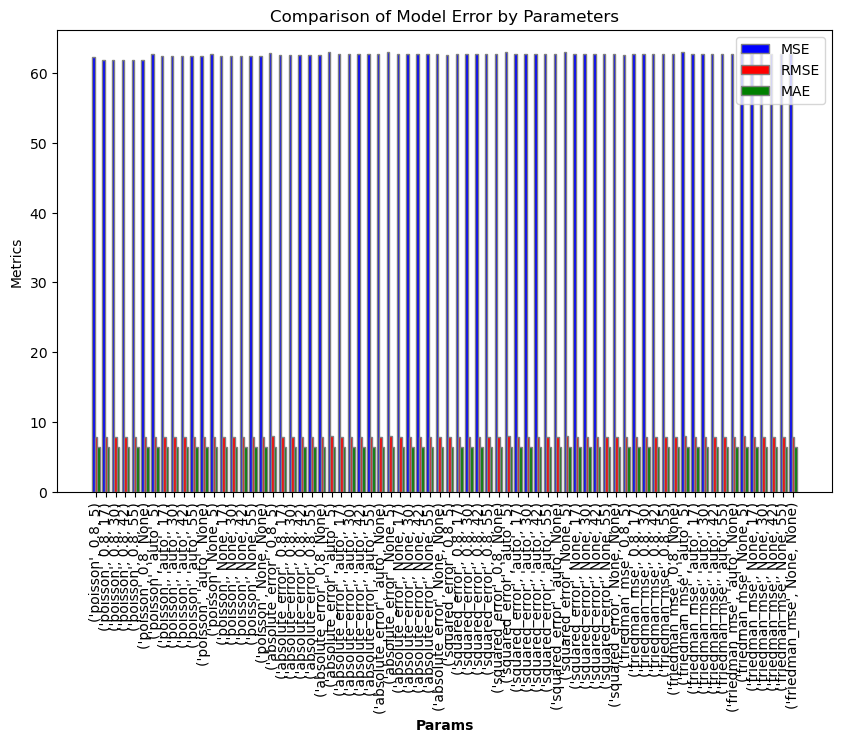

,model,params,mse,rmse,mae
1,random_forest_regressor,"(poisson, 0.8, 17)",61.859091,7.865055,6.390909
2,random_forest_regressor,"(poisson, 0.8, 30)",61.859091,7.865055,6.390909
3,random_forest_regressor,"(poisson, 0.8, 42)",61.859091,7.865055,6.390909
4,random_forest_regressor,"(poisson, 0.8, 55)",61.859091,7.865055,6.390909
5,random_forest_regressor,"(poisson, 0.8, None)",61.859091,7.865055,6.390909
0,random_forest_regressor,"(poisson, 0.8, 5)",62.222727,7.888138,6.413636
17,random_forest_regressor,"(poisson, None, None)",62.488636,7.904975,6.425000
16,random_forest_regressor,"(poisson, None, 55)",62.488636,7.904975,6.425000
15,random_forest_regressor,"(poisson, None, 42)",62.488636,7.904975,6.425000
14,random_forest_regressor,"(poisson, None, 30)",62.488636,7.904975,6.425000


,model,params,mse,rmse,mae
1,random_forest_regressor,"(poisson, 0.8, 17)",61.859091,7.865055,6.390909
2,random_forest_regressor,"(poisson, 0.8, 30)",61.859091,7.865055,6.390909
3,random_forest_regressor,"(poisson, 0.8, 42)",61.859091,7.865055,6.390909
4,random_forest_regressor,"(poisson, 0.8, 55)",61.859091,7.865055,6.390909
5,random_forest_regressor,"(poisson, 0.8, None)",61.859091,7.865055,6.390909
0,random_forest_regressor,"(poisson, 0.8, 5)",62.222727,7.888138,6.413636
17,random_forest_regressor,"(poisson, None, None)",62.488636,7.904975,6.425000
16,random_forest_regressor,"(poisson, None, 55)",62.488636,7.904975,6.425000
15,random_forest_regressor,"(poisson, None, 42)",62.488636,7.904975,6.425000
14,random_forest_regressor,"(poisson, None, 30)",62.488636,7.904975,6.425000


In [7]:
all_results = []

comparison_dict = {
    'model':[], 
    'params':[], 
    'mse':[], 
    'rmse':[], 
    'mae':[], 
    }

params={'criterion': ['poisson', 'absolute_error', 'squared_error', 'friedman_mse'],
        'max_features': [0.8, 'auto', None],
        'max_depth': list(np.linspace(5, 55, 5, dtype=int)) + [None]}

for criterion in params['criterion']:
    for max_features in params['max_features']:
        for max_depth in params['max_depth']:
            model_params = (criterion, max_features, max_depth)
            model = RandomForestRegressor(criterion = criterion,
                                          max_features = max_features, max_depth = max_depth, random_state = 1)
            my_pipeline = make_pipeline(column_transform, model)
            my_pipeline.fit(X_train, y_train)
            predictions = my_pipeline.predict(X_test)
            predictions = np.round(predictions)
            predictions = np.sort(predictions)

            mse = mean_squared_error(y_test, predictions)
            print(f"MSE: {mse}")
            rmse = np.sqrt(mse)
            print(f"RMSE: {rmse}")
            mae = mean_absolute_error(y_test, predictions)
            print(f"MAE: {mae}")

            comparison_dict['model'].append('random_forest_regressor')
            comparison_dict['params'].append(model_params)
            comparison_dict['mse'].append(mse)
            comparison_dict['rmse'].append(rmse)
            comparison_dict['mae'].append(mae)

comparison_df = pd.DataFrame(comparison_dict)
all_results.append({'random_forest_regressor': comparison_df})

import matplotlib.pyplot as plt
import numpy as np

# Data preparation
models = comparison_dict['model']
params = comparison_dict['params']
mse = comparison_dict['mse']
rmse = comparison_dict['rmse']
mae = comparison_dict['mae']

# Number of params
n = len(params)

# Creating bar positions
barWidth = 0.25
r1 = np.arange(n)
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

# Creating the bar plot
plt.figure(figsize=(10,6))

plt.bar(r1, mse, color='b', width=barWidth, edgecolor='grey', label='MSE')
plt.bar(r2, rmse, color='r', width=barWidth, edgecolor='grey', label='RMSE')
plt.bar(r3, mae, color='g', width=barWidth, edgecolor='grey', label='MAE')

# Adding labels
plt.xlabel('Params', fontweight='bold')
plt.xticks([r + barWidth for r in range(n)], params, rotation=90)
plt.ylabel('Metrics')
plt.title('Comparison of Model Error by Parameters')

# Create legend & Show plot
plt.legend()
plt.show()

sorted_df = comparison_df.sort_values(by='mse', ascending=True)
display(sorted_df.head(20))

sorted_df = comparison_df.sort_values(by='mae', ascending=True)
display(sorted_df.head(20))

In [8]:
comparison_df = pd.DataFrame(comparison_dict)
display(comparison_df)

min_value_index = comparison_df['mse'].idxmin()
min_value_row = comparison_df.loc[min_value_index]
display(min_value_row)

min_value_index = comparison_df['rmse'].idxmin()
min_value_row = comparison_df.loc[min_value_index]
display(min_value_row)

min_value_index = comparison_df['mae'].idxmin()
min_value_row = comparison_df.loc[min_value_index]
display(min_value_row)

comparison_df = pd.DataFrame({'actual':y_test, 'predicted':predictions})
comparison_df.head(20)

,model,params,mse,rmse,mae
0,random_forest_regressor,"(poisson, 0.8, 5)",62.222727,7.888138,6.413636
1,random_forest_regressor,"(poisson, 0.8, 17)",61.859091,7.865055,6.390909
2,random_forest_regressor,"(poisson, 0.8, 30)",61.859091,7.865055,6.390909
3,random_forest_regressor,"(poisson, 0.8, 42)",61.859091,7.865055,6.390909
4,random_forest_regressor,"(poisson, 0.8, 55)",61.859091,7.865055,6.390909
...,...,...,...,...,...
67,random_forest_regressor,"(friedman_mse, None, 17)",62.765909,7.922494,6.434091
68,random_forest_regressor,"(friedman_mse, None, 30)",62.765909,7.922494,6.434091
69,random_forest_regressor,"(friedman_mse, None, 42)",62.765909,7.922494,6.434091
70,random_forest_regressor,"(friedman_mse, None, 55)",62.765909,7.922494,6.434091


model     random_forest_regressor
params         (poisson, 0.8, 17)
mse                     61.859091
rmse                     7.865055
mae                      6.390909
Name: 1, dtype: object

model     random_forest_regressor
params         (poisson, 0.8, 17)
mse                     61.859091
rmse                     7.865055
mae                      6.390909
Name: 1, dtype: object

model     random_forest_regressor
params         (poisson, 0.8, 17)
mse                     61.859091
rmse                     7.865055
mae                      6.390909
Name: 1, dtype: object

,actual,predicted
2860,1.0,1.0
2861,2.0,1.0
2862,3.0,1.0
2863,4.0,1.0
2864,5.0,1.0
2865,6.0,1.0
2866,7.0,1.0
2867,8.0,1.0
2868,9.0,1.0
2869,10.0,1.0


# Linear Regression

MSE: 4.8568181818181815
MSE: 124.93409090909091


/Users/mauricechiu/opt/anaconda3/envs/573/lib/python3.10/site-packages/sklearn/utils/_param_validation.py:558: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
/Users/mauricechiu/opt/anaconda3/envs/573/lib/python3.10/site-packages/sklearn/utils/_param_validation.py:558: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


,model,params,mse
0,linear_regression,1,4.856818
1,linear_regression,0,124.934091


,model,params,mse
0,linear_regression,1,4.856818
1,linear_regression,0,124.934091


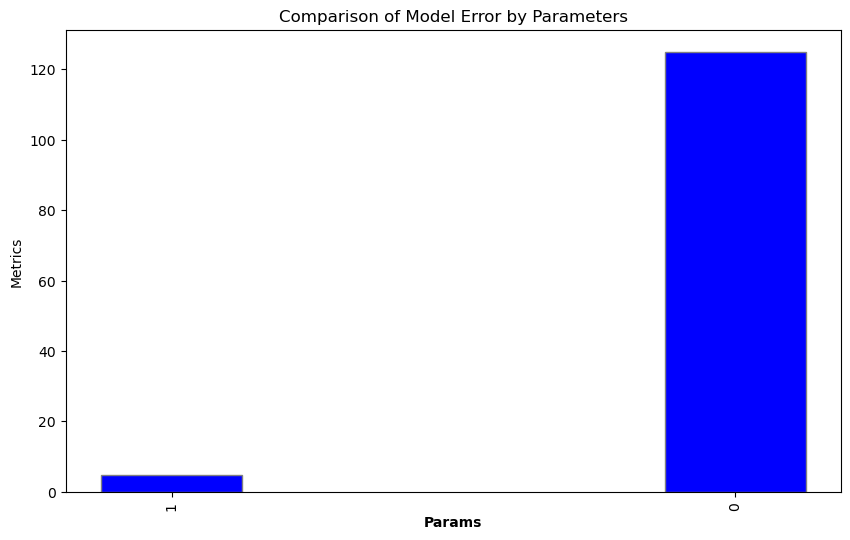

In [9]:
from sklearn.linear_model import LinearRegression

comparison_dict = {
    'model':[], 
    'params':[], 
    'mse':[], 
    }

params={'fit_intercept': [1, 0]}

for fit_intercept in params['fit_intercept']:
    model_params = (fit_intercept)
    model = LinearRegression(fit_intercept = fit_intercept)
    
    my_pipeline = make_pipeline(column_transform, model)
    my_pipeline.fit(X_train, y_train)
    predictions = my_pipeline.predict(X_test)
    predictions = np.round(predictions)

    mse = mean_squared_error(y_test, predictions)
    print(f"MSE: {mse}")

    comparison_dict['model'].append('linear_regression')
    comparison_dict['params'].append(model_params)
    comparison_dict['mse'].append(mse)

import matplotlib.pyplot as plt
import numpy as np

# Data preparation
models = comparison_dict['model']
params = comparison_dict['params']
mse = comparison_dict['mse']

# Number of params
n = len(params)

# Creating bar positions
barWidth = 0.25
r1 = np.arange(n)
r2 = [x + barWidth for x in r1]

# Creating the bar plot
plt.figure(figsize=(10,6))

plt.bar(r1, mse, color='b', width=barWidth, edgecolor='grey', label='MSE')

# Adding labels
plt.xlabel('Params', fontweight='bold')
plt.xticks([r for r in range(n)], params, rotation=90)
plt.ylabel('Metrics')
plt.title('Comparison of Model Error by Parameters')

comparison_df = pd.DataFrame(comparison_dict)

all_results.append({'linear_regression': comparison_df})
display(comparison_df)
sorted_df = comparison_df.sort_values(by='mse', ascending=True)
display(sorted_df.head(20))

In [10]:
comparison_df = pd.DataFrame({'actual':y_test, 'predicted':predictions})
comparison_df.head(20)

,actual,predicted
2860,1.0,-10.0
2861,2.0,-9.0
2862,3.0,-8.0
2863,4.0,-7.0
2864,5.0,-6.0
2865,6.0,-5.0
2866,7.0,-4.0
2867,8.0,-3.0
2868,9.0,-2.0
2869,10.0,-1.0


# LogisticRegression

ACC: 0.05
ACC: 0.05
ACC: 0.05
ACC: 0.08863636363636364
ACC: 0.1159090909090909
ACC: 0.12272727272727273
ACC: 0.15681818181818183
ACC: 0.22045454545454546
ACC: 0.2909090909090909
ACC: 0.3931818181818182
ACC: 0.5295454545454545
ACC: 0.5909090909090909
ACC: 0.6386363636363637
ACC: 0.6681818181818182
ACC: 0.7068181818181818
ACC: 0.7295454545454545
ACC: 0.7431818181818182
ACC: 0.75
ACC: 0.759090909090909
ACC: 0.759090909090909
ACC: 0.05
ACC: 0.05
ACC: 0.05
ACC: 0.0659090909090909
ACC: 0.11363636363636363
ACC: 0.125
ACC: 0.15227272727272728
ACC: 0.19318181818181818
ACC: 0.2340909090909091
ACC: 0.27045454545454545
ACC: 0.27045454545454545
ACC: 0.2681818181818182
ACC: 0.28863636363636364
ACC: 0.29545454545454547
ACC: 0.29772727272727273
ACC: 0.30227272727272725
ACC: 0.29318181818181815
ACC: 0.2840909090909091
ACC: 0.28863636363636364
ACC: 0.2840909090909091
ACC: 0.17272727272727273
ACC: 0.18636363636363637
ACC: 0.18409090909090908
ACC: 0.19318181818181818
ACC: 0.21136363636363636
ACC: 0.220454

,model,params,acc
0,logistic_regression,"(l1, saga, 0.001)",0.050000
1,logistic_regression,"(l1, saga, 0.001623776739188721)",0.050000
2,logistic_regression,"(l1, saga, 0.0026366508987303583)",0.050000
3,logistic_regression,"(l1, saga, 0.004281332398719396)",0.088636
4,logistic_regression,"(l1, saga, 0.0069519279617756054)",0.115909
...,...,...,...
75,logistic_regression,"(l2, liblinear, 1.438449888287663)",0.263636
76,logistic_regression,"(l2, liblinear, 2.3357214690901213)",0.268182
77,logistic_regression,"(l2, liblinear, 3.792690190732246)",0.275000
78,logistic_regression,"(l2, liblinear, 6.158482110660261)",0.275000


KeyError: 'mse'

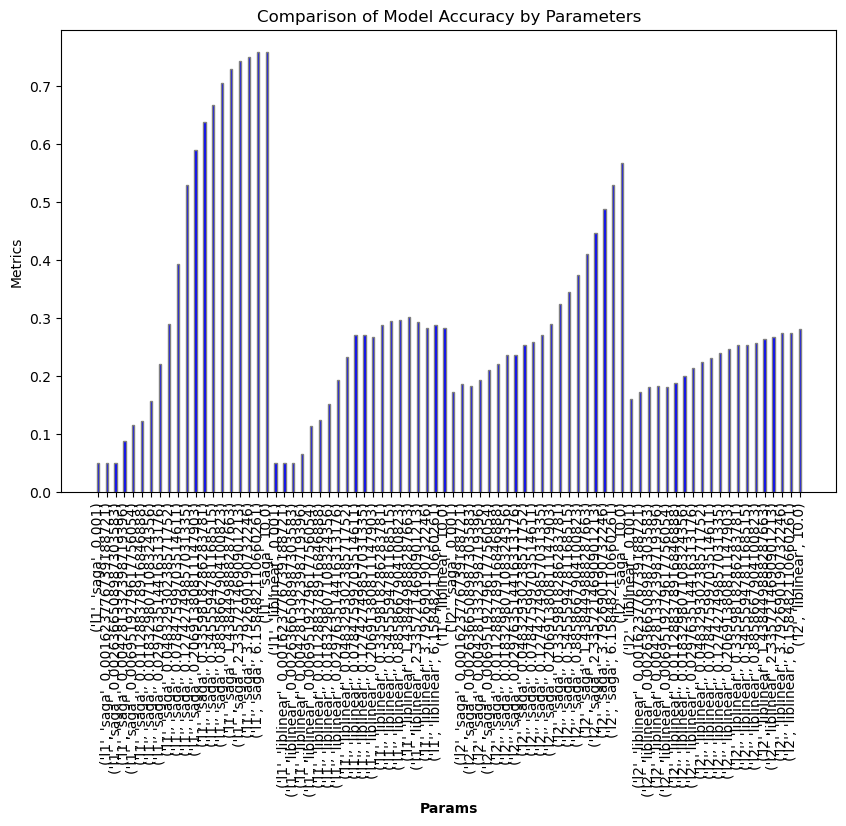

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, accuracy_score

# Logistic Regression
comparison_dict = {
    'model':[], 
    'params':[], 
    'acc':[], 
    }

params={'penalty': ['l1', 'l2'],
        'solver': ['saga', 'liblinear'],
        'C': np.logspace(-3,1,20)}

for penalty in params['penalty']:
    for solver in params['solver']:
        for c in params['C']:
            model_params = (penalty, solver, c)
            model = LogisticRegression(penalty = penalty, solver = solver, C = c, max_iter = 10000)
            
            my_pipeline = make_pipeline(column_transform, model)
            my_pipeline.fit(X_train, y_train)
            predictions = my_pipeline.predict(X_test)
            predictions = np.round(predictions)

            acc = accuracy_score(y_test, predictions)
            print(f"ACC: {acc}")
            
            comparison_dict['model'].append('logistic_regression')
            comparison_dict['params'].append(model_params)
            comparison_dict['acc'].append(acc)

import matplotlib.pyplot as plt
import numpy as np

# Data preparation
models = comparison_dict['model']
params = comparison_dict['params']
acc = comparison_dict['acc']

# Number of params
n = len(params)

# Creating bar positions
barWidth = 0.25
r1 = np.arange(n)
r2 = [x + barWidth for x in r1]

# Creating the bar plot
plt.figure(figsize=(10,6))

plt.bar(r1, acc, color='b', width=barWidth, edgecolor='grey', label='ACC')

# Adding labels
plt.xlabel('Params', fontweight='bold')
plt.xticks([r for r in range(n)], params, rotation=90)
plt.ylabel('Metrics')
plt.title('Comparison of Model Accuracy by Parameters')

comparison_df = pd.DataFrame(comparison_dict)
all_results.append({'logistic_regression': comparison_df})
# display(comparison_df)
sorted_df = comparison_df.sort_values(by='acc', ascending=False)
display(sorted_df.head(20))

In [ ]:
max_value_index = comparison_df['acc'].idxmax()
max_value_row = comparison_df.loc[max_value_index]
display(max_value_row)

comparison_df = pd.DataFrame({'actual':y_test, 'predicted':predictions})
comparison_df.head(20)

model               logistic_regression
params    (l1, saga, 6.158482110660261)
acc                            0.759091
Name: 18, dtype: object

,actual,predicted
2860,1.0,1.0
2861,2.0,2.0
2862,3.0,5.0
2863,4.0,5.0
2864,5.0,8.0
2865,6.0,7.0
2866,7.0,8.0
2867,8.0,8.0
2868,9.0,11.0
2869,10.0,8.0


# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score

comparison_dict = {
    'model':[], 
    'params':[], 
    'acc':[], 
    }

params={'criterion': ['gini', 'entropy'],
        'max_features': [0.8, 'auto', None],
        'max_depth': list(np.linspace(5, 55, 5, dtype=int)) + [None]}

for criterion in params['criterion']:
    for max_features in params['max_features']:
        for max_depth in params['max_depth']:
            model_params = (criterion, max_features, max_depth)
            model = RandomForestClassifier(criterion = criterion, max_features = max_features, max_depth = max_depth)
            
            my_pipeline = make_pipeline(column_transform, model)
            my_pipeline.fit(X_train, y_train)
            predictions = my_pipeline.predict(X_test)
            predictions = np.round(predictions)

            acc = accuracy_score(y_test, predictions)
            print(f"ACC: {acc}")
            
            comparison_dict['model'].append('random_forest_classifier')
            comparison_dict['params'].append(model_params)
            comparison_dict['acc'].append(acc)

import matplotlib.pyplot as plt
import numpy as np

# Data preparation
models = comparison_dict['model']
params = comparison_dict['params']
acc = comparison_dict['acc']

# Number of params
n = len(params)

# Creating bar positions
barWidth = 0.25
r1 = np.arange(n)
r2 = [x + barWidth for x in r1]

# Creating the bar plot
plt.figure(figsize=(10,6))

plt.bar(r1, acc, color='b', width=barWidth, edgecolor='grey', label='ACC')

# Adding labels
plt.xlabel('Params', fontweight='bold')
plt.xticks([r for r in range(n)], params, rotation=90)
plt.ylabel('Metrics')
plt.title('Comparison of Model Accuracy by Parameters')

comparison_df = pd.DataFrame(comparison_dict)
display(comparison_df)
all_results.append({'random_forest_classifier': comparison_df})
sorted_df = comparison_df.sort_values(by='acc', ascending=False)
display(sorted_df.head(20))

ACC: 0.875
ACC: 0.8704545454545455
ACC: 0.8704545454545455
ACC: 0.8772727272727273
ACC: 0.8681818181818182
ACC: 0.8681818181818182


/Users/mauricechiu/opt/anaconda3/envs/573/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


ACC: 0.6636363636363637


/Users/mauricechiu/opt/anaconda3/envs/573/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


ACC: 0.7977272727272727


/Users/mauricechiu/opt/anaconda3/envs/573/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


ACC: 0.7954545454545454


/Users/mauricechiu/opt/anaconda3/envs/573/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


ACC: 0.8090909090909091


/Users/mauricechiu/opt/anaconda3/envs/573/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


ACC: 0.8181818181818182


/Users/mauricechiu/opt/anaconda3/envs/573/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


ACC: 0.8068181818181818
ACC: 0.8727272727272727
ACC: 0.8704545454545455
ACC: 0.8681818181818182
ACC: 0.8727272727272727
ACC: 0.8704545454545455
ACC: 0.8704545454545455
ACC: 0.8772727272727273
ACC: 0.8681818181818182
ACC: 0.8681818181818182
ACC: 0.8727272727272727
ACC: 0.8681818181818182
ACC: 0.8636363636363636


/Users/mauricechiu/opt/anaconda3/envs/573/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


ACC: 0.6818181818181818


/Users/mauricechiu/opt/anaconda3/envs/573/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


ACC: 0.8227272727272728


/Users/mauricechiu/opt/anaconda3/envs/573/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


ACC: 0.825


/Users/mauricechiu/opt/anaconda3/envs/573/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


ACC: 0.8068181818181818


/Users/mauricechiu/opt/anaconda3/envs/573/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


ACC: 0.825


/Users/mauricechiu/opt/anaconda3/envs/573/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


ACC: 0.7954545454545454
ACC: 0.875
ACC: 0.8704545454545455
ACC: 0.8704545454545455
ACC: 0.8704545454545455
ACC: 0.8704545454545455
ACC: 0.8681818181818182


,model,params,acc
0,logistic_regression,"(l1, saga, 0.001)",0.050000
1,logistic_regression,"(l1, saga, 0.001623776739188721)",0.050000
2,logistic_regression,"(l1, saga, 0.0026366508987303583)",0.050000
3,logistic_regression,"(l1, saga, 0.004281332398719396)",0.065909
4,logistic_regression,"(l1, saga, 0.0069519279617756054)",0.115909
...,...,...,...
111,random_forest_classifier,"(entropy, None, 17)",0.870455
112,random_forest_classifier,"(entropy, None, 30)",0.870455
113,random_forest_classifier,"(entropy, None, 42)",0.870455
114,random_forest_classifier,"(entropy, None, 55)",0.870455


,model,params,acc
83,random_forest_classifier,"(gini, 0.8, 42)",0.877273
98,random_forest_classifier,"(entropy, 0.8, 5)",0.877273
80,random_forest_classifier,"(gini, 0.8, 5)",0.875000
110,random_forest_classifier,"(entropy, None, 5)",0.875000
95,random_forest_classifier,"(gini, None, 42)",0.872727
92,random_forest_classifier,"(gini, None, 5)",0.872727
101,random_forest_classifier,"(entropy, 0.8, 42)",0.872727
93,random_forest_classifier,"(gini, None, 17)",0.870455
82,random_forest_classifier,"(gini, 0.8, 30)",0.870455
97,random_forest_classifier,"(gini, None, None)",0.870455


In [ ]:
max_value_index = comparison_df['acc'].idxmax()
max_value_row = comparison_df.loc[max_value_index]
display(max_value_row)

comparison_df = pd.DataFrame({'actual':y_test, 'predicted':predictions})
comparison_df.head(20)

model     random_forest_classifier
params             (gini, 0.8, 42)
acc                       0.877273
Name: 83, dtype: object

,actual,predicted
2860,1.0,1.0
2861,2.0,2.0
2862,3.0,3.0
2863,4.0,4.0
2864,5.0,5.0
2865,6.0,6.0
2866,7.0,7.0
2867,8.0,8.0
2868,9.0,9.0
2869,10.0,10.0


# Support Vector Machine

In [ ]:
from sklearn.svm import SVC

comparison_dict = {
    'model':[], 
    'params':[], 
    'acc':[], 
    }

params={'gamma': np.logspace(-4, -1, 20),
        'C': np.logspace(-2, 1, 20),
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid']} 

for gamma in params['gamma']:
    for c in params['C']:
        for kernel in params['kernel']:
            model_params = (gamma, c, kernel)
            model = SVC(probability = True, gamma = gamma, C = c, kernel = kernel )
            
            my_pipeline = make_pipeline(column_transform, model)
            my_pipeline.fit(X_train, y_train)
            predictions = my_pipeline.predict(X_test)
            predictions = np.round(predictions)

            acc = accuracy_score(y_test, predictions)
            print(f"ACC: {acc}")
            
            comparison_dict['model'].append('random_forest_classifier')
            comparison_dict['params'].append(model_params)
            comparison_dict['acc'].append(acc)

import matplotlib.pyplot as plt
import numpy as np

# Data preparation
models = comparison_dict['model']
params = comparison_dict['params']
acc = comparison_dict['acc']

# Number of params
n = len(params)

# Creating bar positions
barWidth = 0.25
r1 = np.arange(n)
r2 = [x + barWidth for x in r1]

# Creating the bar plot
plt.figure(figsize=(10,6))

plt.bar(r1, acc, color='b', width=barWidth, edgecolor='grey', label='ACC')

# Adding labels
plt.xlabel('Params', fontweight='bold')
plt.xticks([r for r in range(n)], params, rotation=90)
plt.ylabel('Metrics')
plt.title('Comparison of Model Accuracy by Parameters')

comparison_df = pd.DataFrame(comparison_dict)
all_results.append({'support_vector_machine': comparison_df})
display(comparison_df)
sorted_df = comparison_df.sort_values(by='acc', ascending=False)
display(sorted_df.head(20))

ACC: 0.24545454545454545
ACC: 0.06363636363636363
ACC: 0.1318181818181818
ACC: 0.1318181818181818
ACC: 0.25227272727272726
ACC: 0.06363636363636363
ACC: 0.1318181818181818
ACC: 0.1318181818181818
ACC: 0.26590909090909093
ACC: 0.06363636363636363
ACC: 0.1318181818181818
ACC: 0.1318181818181818
ACC: 0.31363636363636366
ACC: 0.06363636363636363
ACC: 0.1318181818181818
ACC: 0.1318181818181818
ACC: 0.3181818181818182
ACC: 0.06363636363636363
ACC: 0.1318181818181818
ACC: 0.1318181818181818
ACC: 0.3659090909090909
ACC: 0.06363636363636363
ACC: 0.1318181818181818
ACC: 0.1318181818181818
ACC: 0.40454545454545454
ACC: 0.06363636363636363
ACC: 0.1318181818181818
ACC: 0.1318181818181818
ACC: 0.4409090909090909
ACC: 0.06363636363636363
ACC: 0.1318181818181818
ACC: 0.1318181818181818
ACC: 0.49772727272727274
ACC: 0.06363636363636363
ACC: 0.1318181818181818
ACC: 0.1318181818181818
ACC: 0.6181818181818182
ACC: 0.06363636363636363
ACC: 0.1318181818181818
ACC: 0.1318181818181818
ACC: 0.8
ACC: 0.06363636

KeyboardInterrupt: 

In [ ]:
sorted_df = comparison_df.sort_values(by='acc', ascending=False)
display(sorted_df.head(20))

max_value_index = comparison_df['acc'].idxmax()
max_value_row = comparison_df.loc[max_value_index]
display(max_value_row)

comparison_df = pd.DataFrame({'actual':y_test, 'predicted':predictions})
comparison_df.head(20)

SyntaxError: '(' was never closed (2387006327.py, line 2)

# Neural Network (Classification)

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error, accuracy_score

comparison_dict = {
    'model':[], 
    'params':[], 
    'acc':[], 
    }

params={'hidden_layer_sizes': [(80,20,40,5), (75,25,50,10)], 
        'activation': ['identity', 'logistic', 'tanh', 'relu'], 
        'solver': ['adam', 'sgd', 'lbfgs'], 
        'alpha': np.logspace(-4,2,20)} 

for hidden_layer_sizes in params['hidden_layer_sizes']:
    for activation in params['activation']:
        for solver in params['solver']:
            for alpha in params['alpha']:
                model_params = (hidden_layer_sizes, activation, solver, alpha )
                model = MLPClassifier(hidden_layer_sizes = hidden_layer_sizes,
                                      activation = activation, solver = solver, alpha = alpha, random_state = 1)
            
                my_pipeline = make_pipeline(column_transform, model)
                my_pipeline.fit(X_train, y_train)
                predictions = my_pipeline.predict(X_test)
                predictions = np.round(predictions)

                acc = accuracy_score(y_test, predictions)
                print(f"ACC: {acc}")
                
                comparison_dict['model'].append('random_forest_classifier')
                comparison_dict['params'].append(model_params)
                comparison_dict['acc'].append(acc)

import matplotlib.pyplot as plt
import numpy as np

# Data preparation
models = comparison_dict['model']
params = comparison_dict['params']
acc = comparison_dict['acc']

# Number of params
n = len(params)

# Creating bar positions
barWidth = 0.25
r1 = np.arange(n)
r2 = [x + barWidth for x in r1]

# Creating the bar plot
plt.figure(figsize=(10,6))

plt.bar(r1, acc, color='b', width=barWidth, edgecolor='grey', label='ACC')

# Adding labels
plt.xlabel('Params', fontweight='bold')
plt.xticks([r for r in range(n)], params, rotation=90)
plt.ylabel('Metrics')
plt.title('Comparison of Model Accuracy by Parameters')

comparison_df = pd.DataFrame(comparison_dict)
all_results.append({'neural_net_classifier': comparison_df})
display(comparison_df)
sorted_df = comparison_df.sort_values(by='acc', ascending=False)
display(sorted_df.head(20))

In [ ]:
max_value_index = comparison_df['acc'].idxmax()
max_value_row = comparison_df.loc[max_value_index]
display(max_value_row)

comparison_df = pd.DataFrame({'actual':y_test, 'predicted':predictions})
comparison_df.head(20)